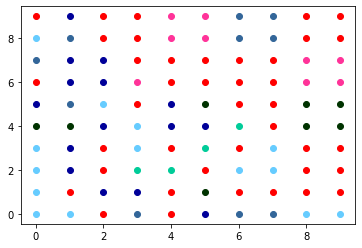

In [40]:
import numpy as np
import matplotlib.pyplot as plt

class SOMmp:
    def __init__(self, nrOutputNodes, nrFetures, data, nrSamples, stepSize):
        self.weights = np.random.random((nrOutputNodes,nrOutputNodes,nrFetures)) # 10st 10x31 matriser
        self.data = data
        self.nrOutputNodes = nrOutputNodes
        self.nrSamples = nrSamples
        self.stepSize = stepSize

    def findMostSimularNode(self, sample):
        distances = np.zeros(self.nrOutputNodes*self.nrOutputNodes)
        
        for i in range(self.nrOutputNodes):
            for j in range(self.nrOutputNodes):
                difference = sample - self.weights[i][j]
                distances[i*10 + j] = np.dot(difference.T, difference)
        
        winnerNode = distances.argmin()
        # [i] ger i:te klustret, [j] ger j:te raden inuti i:te klustret
        return winnerNode

    def updateWeights(self, sample, winnerNode, neighbourhood):
        start_i = max(winnerNode[0] - neighbourhood,0)
        start_j = max(winnerNode[1] - neighbourhood,0)
        end_i = min(winnerNode[0] + neighbourhood,self.nrOutputNodes)
        end_j = min(winnerNode[1] + neighbourhood,self.nrOutputNodes)
        
        for i in range(start_i, end_i):
            for j in range(start_j,end_j):
                deltaW = sample - self.weights[i][j]
                self.weights[i][j] = self.weights[i][j] + (0.2*deltaW)

    def run(self, neighbourhood):
        pos = np.zeros(self.nrSamples)
        new_pos = np.zeros((self.nrSamples,2))
        count = 0
        
        for sample in self.data:
            winNode = self.findMostSimularNode(sample) # index
            pos[count] = winNode
            count = count + 1
            if winNode < 10:
                winnerNode = [0, winNode]
            else:
                strWinNode = str(winNode)
                winnerNode = [int(strWinNode[0]),int(strWinNode[1])]
            
            self.updateWeights(sample, winnerNode, neighbourhood)
            
        return pos
    
# Coding: 0=no party, 1='m', 2='fp', 3='s', 4='v', 5='mp', 6='kd', 7='c'
# Use some color scheme for these different groups
# Coding: Male 0, Female 1

def readVotes(array):
    arr = np.copy(array)
    
    with open('data_lab2/votes.dat','r') as f:
        MP_file = f.readlines()
        MP_file = [x.strip() for x in MP_file]
        MP_votes = MP_file[0].split(',')
        
    for MP in range(arr.shape[0]):
        for vote in range(arr.shape[1]):
            arr[MP][vote] = MP_votes[MP+vote]

    return arr

def readList(MP, path):
    arr = np.zeros(MP)
    #coding = 0=no party, 1='m', 2='fp', 3='s', 4='v', 5='mp', 6='kd', 7='c'
    
    with open(path,'r') as f:
        attribute_file = f.readlines()
        attribute_file = [x.strip() for x in attribute_file]        
        
    for i in range(len(arr)):
        arr[i] = attribute_file[i]
        
    return arr

def plotParty(mp_party,selfOrgMap,mp_votes):
    mpParty_sorted = np.zeros(len(mp_party))
#     sorted_indices = np.argsort(organizedMap)

#     for k in range(len(mp_party)):
#         mpParty_sorted[k] = mp_party[sorted_indices[k]]
    for i in range(10):
        for j in range(10):
            # find closest input to weight
            shortestDistance = 1000000000
            voteIndex = -1
            for k in range(349):
                difference = np.subtract(mp_votes[k], selfOrgMap.weights[i][j])
                distanceTemp = np.dot(difference.T, difference)
                if shortestDistance > distanceTemp:
                    shortestDistance = distanceTemp
                    voteIndex = k
                    
            if mp_party[voteIndex] == 1:
                plt.plot(i, j, color='#000099', marker='o', label='m')
            elif mp_party[voteIndex] == 2:
                plt.plot(i, j, color='#66ccff', marker='o', label='fp')
            elif mp_party[voteIndex] == 3:
                plt.plot(i, j, color='#ff0000', marker='o', label='s')
            elif mp_party[voteIndex] == 4:
                plt.plot(i, j, color='#ff3399', marker='o', label='v')
            elif mp_party[voteIndex] == 5:
                plt.plot(i, j, color='#003300', marker='o', label='mp')
            elif mp_party[voteIndex] == 6:
                plt.plot(i, j, color='#336699', marker='o', label='kd')
            elif mp_party[voteIndex] == 7:
                plt.plot(i, j, color='#00cc99', marker='o', label='c')
            else:
                plt.plot(i, j, color='#000000', marker='o', label='no party')
    plt.show()
            
            
    
def topologyOrderingCities():
    outputNodesDim = 10
    features = 31
    MP = 349

    props = np.zeros((MP,features))
    props = readVotes(props)
    
    selfOrgMap = SOMmp(outputNodesDim, features, props, MP, 0.2)
    
    epochs = 500
    startNeighbours = 8
    for epoch in range(epochs):
        nrNeighbours = round((startNeighbours - (epoch * startNeighbours/ (epochs-1)))/2)
        organizedMap = selfOrgMap.run(nrNeighbours)
    
    path = 'data_lab2/mpparty.dat'
    #mpData = readList(MP,path)
    plotParty(t,selfOrgMap,props)
    #plotParty(t,organizedMap,props)
    
topologyOrderingCities()

In [14]:
t = np.array(['1', '2', '1', '1', '3', '1', '4', '3', '5', '2', '6', '3', '3', '1', '4', '6', '4', '2', '3', '2', '3', '1', '3', '1', '3', '2', '3', '2', '5', '3', '2', '3', '0', '3', '6', '1', '6', '1', '1', '2', '3', '3', '3', '3', '3', '3', '1', '6', '1', '3', '3', '1', '2', '5', '4', '3', '1', '2', '2', '4', '7', '2', '1', '1', '5', '2', '2', '3', '1', '4', '7', '3', '1', '3', '3', '6', '5', '3', '2', '2', '1', '3', '3', '3', '3', '6', '3', '5', '4', '2', '7', '1', '3', '4', '3', '3', '5', '6', '7', '1', '3', '6', '1', '2', '3', '3', '3', '2', '1', '6', '6', '3', '3', '4', '3', '7', '3', '6', '3', '1', '2', '1', '7', '3', '3', '3', '6', '2', '7', '6', '3', '1', '4', '3', '3', '3', '2', '3', '3', '3', '3', '1', '6', '2', '3', '3', '3', '3', '3', '4', '3', '1', '2', '1', '3', '6', '1', '3', '3', '4', '3', '2', '2', '1', '3', '3', '3', '3', '2', '4', '3', '1', '1', '6', '1', '2', '5', '7', '1', '6', '3', '4', '3', '2', '3', '7', '1', '3', '3', '3', '3', '3', '3', '2', '4', '6', '2', '1', '7', '1', '3', '2', '4', '3', '2', '3', '1', '1', '4', '6', '1', '5', '6', '3', '3', '3', '2', '2', '3', '4', '1', '1', '3', '6', '7', '3', '2', '5', '2', '3', '3', '3', '5', '3', '1', '6', '3', '4', '2', '3', '7', '3', '3', '3', '2', '6', '1', '7', '3', '7', '6', '4', '3', '3', '3', '2', '1', '3', '3', '4', '3', '7', '2', '6', '1', '5', '3', '3', '3', '3', '3', '1', '4', '5', '2', '7', '3', '6', '3', '3', '3', '2', '1', '3', '3', '3', '7', '4', '6', '3', '3', '1', '2', '7', '5', '3', '3', '4', '6', '3', '3', '1', '3', '4', '7', '3', '3', '6', '5', '3', '2', '3', '3', '3', '3', '3', '7', '4', '6', '2', '1', '3', '3', '3', '1', '4', '7', '3', '3', '3', '4', '2', '3', '6', '1', '5', '3', '7', '3', '3', '3', '4', '5', '6', '3', '3', '3', '1', '2'])

In [15]:
len(t)

349

In [23]:
t = [int(i) for i in t]